<a href="https://colab.research.google.com/github/deviandinifebrianti/Machine-Learning/blob/main/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

In [1]:
import tensorflow as tf#untuk pengembangan jaringan saraf
from tensorflow.keras import datasets, layers, utils, models, callbacks# untuk membangun, melatih, dan menguji model jaringan saraf.
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt#untuk membuat visualisasi dan plot data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = utils.to_categorical(y_train, 10)
y_cat_test = utils.to_categorical(y_test, 10)

INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2)

batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/50
1562/1562 [==============================] - 61s 30ms/step - loss: 1.6316 - accuracy: 0.4146 - precision: 0.6249 - recall: 0.2023 - val_loss: 1.1611 - val_accuracy: 0.5845 - val_precision: 0.7419 - val_recall: 0.4392
Epoch 2/50
1562/1562 [==============================] - 43s 28ms/step - loss: 1.2215 - accuracy: 0.5662 - precision: 0.7287 - recall: 0.4012 - val_loss: 1.1386 - val_accuracy: 0.6198 - val_precision: 0.7663 - val_recall: 0.4958
Epoch 3/50
1562/1562 [==============================] - 43s 28ms/step - loss: 1.0411 - accuracy: 0.6365 - precision: 0.7706 - recall: 0.5055 - val_loss: 0.9480 - val_accuracy: 0.6761 - val_precision: 0.7762 - val_recall: 0.5871
Epoch 4/50
1562/1562 [==============================] - 43s 28ms/step - loss: 0.9349 - accuracy: 0.6785 - precision: 0.7952 - recall: 0.5655 - val_loss: 0.7822 - val_accuracy: 0.7364 - val_precision: 0.8550 - val_recall: 0.6238
Epoch 5/50
1562/1562 

313/313 [==============================] - 2s 6ms/step - loss: 0.3895 - accuracy: 0.8759 - precision: 0.9022 - recall: 0.8538
Test Accuracy : 87.59%


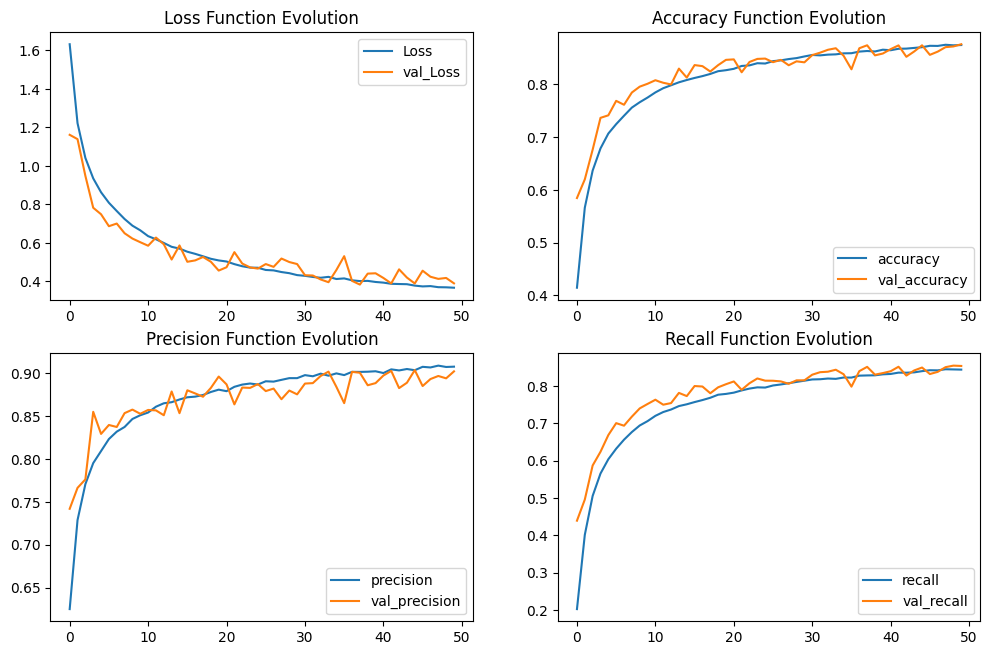

In [3]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

*Tugas 2*

**Buatlah model CNN untuk klasifikasi dataset MNIST.**

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1386 - accuracy: 0.9565 - val_loss: 0.0477 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0443 - accuracy: 0.9865 - val_loss: 0.0360 - val_accuracy: 0.9891
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0250 - accuracy: 0.9924 - val_loss: 0.0274 - val_accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0290 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0164 - accuracy: 0.9946 - val_loss: 0.0378 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step

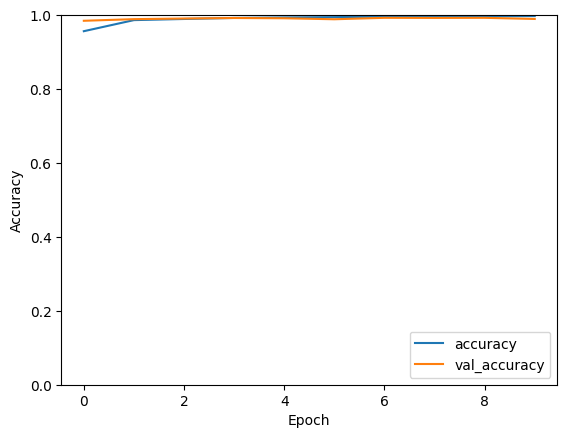

In [4]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to fit the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Define the CNN model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()